## Easy

Взять один файл с маркой машины.

Построить прогноз, используя модели линейной регрессии и случайного леса. Сравнить результаты, используя кросс-валидацию. Подобрать гиперпараметры моделей (для линейной регрессии можно использовать реализацию с градиентным спуском `SGDRegressor`). Оценить качество, используя метрику `r2_score`. Оценить важность признаков (параметр `feature_importance_` у случайного леса).

In [177]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVR


In [148]:
df = pd.read_csv('data/cars/ford.csv')
df = pd.DataFrame(df)
df = df.dropna()
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [149]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Обработка категориальных признаков

In [150]:
df_new = pd.get_dummies(df)
df_new

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Tourneo Custom,model_ Transit Tourneo,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,13000,12456,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,17500,10460,145,40.3,1.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,16500,1482,145,48.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17960,2016,7999,31348,125,54.3,1.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17961,2017,8999,16700,150,47.1,1.4,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,2014,7499,40700,30,57.7,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,2015,9999,7010,20,67.3,1.6,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [151]:
df_total = (df_new - df_new.mean()) / df_new.std()
df_total

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Tourneo Custom,model_ Transit Tourneo,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065075,-0.059003,-0.381039,0.591279,-0.020442,-0.811401,-0.141978,-0.176538,-0.260659,-0.108227,...,-0.062092,-0.007461,3.492732,-2.517596,-0.253771,-0.687134,-0.010551,-0.035015,-0.007461,0.689329
1,0.552798,0.362815,-0.733389,0.591279,-0.020442,-0.811401,-0.141978,-0.176538,-0.260659,-0.108227,...,-0.062092,-0.007461,-0.286293,0.397182,-0.253771,-0.687134,-0.010551,-0.035015,-0.007461,0.689329
2,0.065075,0.151906,-0.560167,0.591279,-0.020442,-0.811401,-0.141978,-0.176538,-0.260659,-0.108227,...,-0.062092,-0.007461,-0.286293,0.397182,-0.253771,-0.687134,-0.010551,-0.035015,-0.007461,0.689329
3,1.040520,1.100996,-0.662672,0.510647,-1.738794,0.345012,-0.141978,-0.176538,-0.260659,-0.108227,...,-0.062092,-0.007461,-0.286293,0.397182,-0.253771,-0.687134,-0.010551,-0.035015,-0.007461,0.689329
4,1.040520,0.890087,-1.123742,0.510647,-0.909245,-0.811401,-0.141978,-0.176538,-0.260659,-0.108227,...,-0.062092,-0.007461,3.492732,-2.517596,-0.253771,-0.687134,-0.010551,-0.035015,-0.007461,0.689329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17960,-0.422648,-0.902850,0.410041,0.188121,-0.356212,-0.348836,-0.141978,-0.176538,-0.260659,-0.108227,...,-0.062092,-0.007461,-0.286293,0.397182,-0.253771,-0.687134,-0.010551,-0.035015,-0.007461,0.689329
17961,0.065075,-0.691941,-0.342214,0.591279,-1.067254,0.113730,7.042931,-0.176538,-0.260659,-0.108227,...,-0.062092,-0.007461,-0.286293,0.397182,-0.253771,-0.687134,-0.010551,-0.035015,-0.007461,0.689329
17962,-1.398093,-1.008304,0.890318,-1.343879,-0.020442,-0.811401,7.042931,-0.176538,-0.260659,-0.108227,...,-0.062092,-0.007461,-0.286293,0.397182,-0.253771,-0.687134,-0.010551,-0.035015,-0.007461,0.689329
17963,-0.910370,-0.481032,-0.839849,-1.505142,0.927615,0.576295,-0.141978,-0.176538,-0.260659,-0.108227,...,-0.062092,-0.007461,-0.286293,0.397182,-0.253771,1.455240,-0.010551,-0.035015,-0.007461,-1.450605


Разобьем выборку на test и train

In [152]:
targets = np.array(df_total['price'])
df = df_total.drop('price', axis = 1)
df = np.array(df)
x_train, x_test, y_train, y_test = train_test_split(df, targets, test_size = 0.50, random_state = 42)

Построим модель случайного леса

In [153]:
model = RandomForestRegressor(n_estimators = 250, max_depth = 15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score(y_pred, y_test)

0.9227794069924848

Кросс-валидация

In [154]:
cross_val = cross_val_score(model, x_train, y_train)
print('RandomForestRegressor')
print('Кросс-валидация на треин выборке:', cross_val)
print('Среднее по кросс-валидации:', cross_val.mean())

print('Качество на тестовой выборке:', r2_score(y_test, y_pred))

RandomForestRegressor
Кросс-валидация на треин выборке: [0.93108177 0.92880329 0.93905683 0.9240204  0.92789495]
Среднее по кросс-валидации: 0.9301714462114294
Качество на тестовой выборке: 0.9288197683540114


Подбор гиперпараметров для модели RandomForestRegressor

In [155]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [156]:
params = {
    'n_estimators': [10, 100, 250],
    'max_depth': [5, 15, 20]
}

In [157]:
search = GridSearchCV(RandomForestRegressor(), params)
search.fit(x_train, y_train)
search.best_estimator_

RandomForestRegressor(max_depth=15, n_estimators=250)

Оценить важность признаков (параметр feature_importance_ у случайного леса)

In [158]:
model.feature_importances_

array([5.01325180e-01, 5.99948836e-02, 5.40179839e-03, 6.70821520e-02,
       2.44299550e-01, 4.92965510e-04, 9.93857963e-04, 2.17339320e-03,
       1.08988877e-02, 2.91538013e-07, 2.01376692e-02, 5.60137771e-03,
       1.49675669e-05, 1.71857510e-03, 3.42944847e-04, 8.79715061e-04,
       3.52688852e-03, 1.83444448e-02, 2.92439606e-02, 1.68231066e-03,
       9.90150599e-03, 3.71055180e-03, 0.00000000e+00, 3.83443338e-03,
       0.00000000e+00, 4.20377184e-04, 4.84501729e-04, 0.00000000e+00,
       1.43927901e-03, 2.56588973e-03, 1.86409650e-03, 9.01512056e-04,
       0.00000000e+00, 2.14453166e-04, 1.32127546e-06, 5.06264536e-04])

Feature: 0, Score: 0.50133
Feature: 1, Score: 0.05999
Feature: 2, Score: 0.00540
Feature: 3, Score: 0.06708
Feature: 4, Score: 0.24430
Feature: 5, Score: 0.00049
Feature: 6, Score: 0.00099
Feature: 7, Score: 0.00217
Feature: 8, Score: 0.01090
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.02014
Feature: 11, Score: 0.00560
Feature: 12, Score: 0.00001
Feature: 13, Score: 0.00172
Feature: 14, Score: 0.00034
Feature: 15, Score: 0.00088
Feature: 16, Score: 0.00353
Feature: 17, Score: 0.01834
Feature: 18, Score: 0.02924
Feature: 19, Score: 0.00168
Feature: 20, Score: 0.00990
Feature: 21, Score: 0.00371
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00383
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00042
Feature: 26, Score: 0.00048
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00144
Feature: 29, Score: 0.00257
Feature: 30, Score: 0.00186
Feature: 31, Score: 0.00090
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00021
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00051


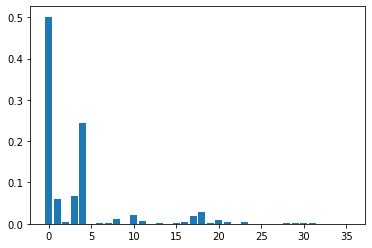

In [166]:
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

SGDRegressor

In [160]:
model_sgd = SGDRegressor(alpha=0.0001, eta0=0.0001, penalty='l1', power_t=0.25, shuffle=False,
       verbose=0, warm_start=False)
model_sgd.fit(x_train, y_train)
y_pred_sgd = model_sgd.predict(x_test)
r2_score(y_pred_sgd, y_test)

0.7229801853206952

In [161]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.1, 0.001, 0.0001],
    'max_iter': [100, 500, 1000],
    'eta0': [0.1, 0.0001]
}

r_search = RandomizedSearchCV(SGDRegressor(), params)
r_search.fit(x_train, y_train)
r_search.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.0001, max_iter=500, penalty='elasticnet')

In [162]:
r_search.best_score_

0.8129032608924496

Кросс-валидация

In [163]:
cross_val = cross_val_score(model_sgd, x_train, y_train)
print('SGDRegressor')
print('Кросс-валидация на треин выборке:', cross_val)
print('Среднее по кросс-валидации:', cross_val.mean())

print('Качество на тестовой выборке:', r2_score(y_test, y_pred_sgd))

SGDRegressor
Кросс-валидация на треин выборке: [0.81726377 0.8140909  0.83438525 0.77331249 0.82618439]
Среднее по кросс-валидации: 0.813047360476333
Качество на тестовой выборке: 0.8168817570865392


In [164]:
model_sgd.coef_

array([ 0.3359098 , -0.27338712,  0.0953264 , -0.12926755,  0.1476044 ,
       -0.0600874 , -0.04542353, -0.01762935,  0.1169995 ,  0.00547777,
       -0.1109576 ,  0.06704718, -0.0151751 ,  0.0671564 , -0.01712027,
        0.01127511, -0.05928203, -0.1277986 ,  0.08810545,  0.00187138,
        0.12656748,  0.07165184,  0.        ,  0.0755478 ,  0.        ,
        0.00580674,  0.0499146 ,  0.        ,  0.03491044, -0.03454076,
        0.01085838,  0.05797877,  0.        ,  0.03048151,  0.00242024,
       -0.06024679])

Feature: 0, Score: 0.33591
Feature: 1, Score: -0.27339
Feature: 2, Score: 0.09533
Feature: 3, Score: -0.12927
Feature: 4, Score: 0.14760
Feature: 5, Score: -0.06009
Feature: 6, Score: -0.04542
Feature: 7, Score: -0.01763
Feature: 8, Score: 0.11700
Feature: 9, Score: 0.00548
Feature: 10, Score: -0.11096
Feature: 11, Score: 0.06705
Feature: 12, Score: -0.01518
Feature: 13, Score: 0.06716
Feature: 14, Score: -0.01712
Feature: 15, Score: 0.01128
Feature: 16, Score: -0.05928
Feature: 17, Score: -0.12780
Feature: 18, Score: 0.08811
Feature: 19, Score: 0.00187
Feature: 20, Score: 0.12657
Feature: 21, Score: 0.07165
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.07555
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00581
Feature: 26, Score: 0.04991
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.03491
Feature: 29, Score: -0.03454
Feature: 30, Score: 0.01086
Feature: 31, Score: 0.05798
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.03048
Feature: 34, Score: 0.00242
Feature: 35, Score:

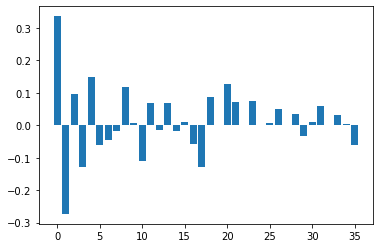

In [167]:
importance = model_sgd.coef_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Normal

Объединить в один датафрейм данные по всем маркам машин. Преобразовать категориальные признаки.

Построить еще несколько моделей, используя подбор гиперпараметров. Сравнить между собой все построенные модели.

In [180]:
import glob

In [181]:
files = glob.glob(r'data/cars/*.csv')
list = []

for filename in files:
    df = pd.read_csv(filename, index_col=None)
    list.append(df)

frame = pd.concat(list, axis=0, ignore_index=True)

In [182]:
frame

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£),fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,A1,2017.0,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A6,2016.0,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A1,2016.0,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A4,2017.0,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A3,2019.0,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118145,Eos,2012.0,5990,Manual,74000,Diesel,125.0,58.9,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118146,Fox,2008.0,1799,Manual,88102,Petrol,145.0,46.3,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118147,Fox,2009.0,1590,Manual,70000,Petrol,200.0,42.0,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118148,Fox,2006.0,1250,Manual,82704,Petrol,150.0,46.3,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим долю отсутствующих данных для каждого признака

In [183]:
for col in frame.columns:
    pct_missing = np.mean(frame[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

model - 0%
year - 0%
price - 0%
transmission - 0%
mileage - 1%
fuelType - 8%
tax - 20%
mpg - 16%
engineSize - 8%
tax(£) - 96%
fuel type - 97%
engine size - 92%
mileage2 - 92%
fuel type2 - 93%
engine size2 - 93%
reference - 92%


Признаки tax(£), fuel type, engine size, mileage2, fuel type2, engine size2, reference содержат высокий % недостающих значений => отбрасываем

In [184]:
features_df = ['model','year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']


По категориальному признаку исключим строки, по которым fuelType равно NaN

In [185]:
df = df[df['fuelType'].notna()]
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


По числовым признакам пропущенные значения заполним средним.

In [186]:
df['mileage'] = df['mileage']. interpolate ()
df['tax'] = df['tax']. interpolate ()
df['mpg'] = df['mpg']. interpolate ()
df['engineSize'] = df['engineSize']. interpolate ()

In [187]:
df = pd.get_dummies(df)

In [188]:
df = (df - df.mean()) / df.std()
df

,year,price,mileage,tax,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.849567,1.052357,-0.387196,0.508103,-0.304449,0.864873,-0.085889,-0.12897,-0.074201,-0.079416,...,-0.156638,-0.154189,-0.248859,2.594748,-1.280814,-0.576392,1.174137,-0.098277,-0.075978,-1.137998
1,0.849567,1.295168,-0.828920,0.508103,-0.304449,0.864873,-0.085889,-0.12897,-0.074201,-0.079416,...,-0.156638,-0.154189,-0.248859,2.594748,-1.280814,-0.576392,1.174137,-0.098277,-0.075978,-1.137998
2,0.849567,0.407613,-0.694067,0.508103,-0.245808,0.864873,-0.085889,-0.12897,-0.074201,-0.079416,...,-0.156638,-0.154189,-0.248859,-0.385368,0.780702,-0.576392,1.174137,-0.098277,-0.075978,-1.137998
3,0.849567,2.147391,-0.816485,0.508103,-1.557915,0.864873,-0.085889,-0.12897,-0.074201,-0.079416,...,-0.156638,-0.154189,-0.248859,2.594748,-1.280814,-0.576392,-0.851633,-0.098277,-0.075978,0.878678
4,0.849567,0.781565,-0.737284,0.586865,-1.022810,-0.218094,-0.085889,-0.12897,-0.074201,-0.079416,...,-0.156638,-0.154189,-0.248859,-0.385368,-1.280814,1.734817,-0.851633,-0.098277,-0.075978,0.878678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,-2.559980,-1.398960,2.454365,0.193056,0.377260,0.864873,-0.085889,-0.12897,-0.074201,-0.079416,...,-0.156638,-0.154189,-0.248859,-0.385368,0.780702,-0.576392,1.174137,-0.098277,-0.075978,-1.137998
15153,-4.508292,-1.939384,3.121159,0.508103,-0.546346,-0.867874,-0.085889,-0.12897,-0.074201,-0.079416,...,-0.156638,-0.154189,-0.248859,-0.385368,0.780702,-0.576392,-0.851633,-0.098277,-0.075978,0.878678
15154,-4.021214,-1.966334,2.265230,1.374482,-0.861545,-0.434687,-0.085889,-0.12897,-0.074201,-0.079416,...,-0.156638,-0.154189,-0.248859,-0.385368,0.780702,-0.576392,-0.851633,-0.098277,-0.075978,0.878678
15155,-5.482449,-2.010177,2.865922,0.586865,-0.546346,-0.867874,-0.085889,-0.12897,-0.074201,-0.079416,...,-0.156638,-0.154189,-0.248859,-0.385368,0.780702,-0.576392,-0.851633,-0.098277,-0.075978,0.878678


In [248]:
x_df = pd.DataFrame(df.drop('price', axis = 1))
x_df_1 = np.array(x_df)

In [249]:
y_df = pd.DataFrame(df['price'])
y_df_1 = np.array(y_df)

In [264]:
x_train, x_test, y_train, y_test = train_test_split(x_df_1, y_df_1, test_size = 0.80)

In [265]:
rfr_model = RandomForestRegressor(n_estimators = 250, max_depth = 15)
rfr_model.fit(x_train, y_train)
y_pred = rfr_model.predict(x_test)
r2_score(y_pred, y_test)

<ipython-input-265-81d44b504b3d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(x_train, y_train)


0.9294269768303608

In [266]:
cross_val = cross_val_score(rfr_model, x_train, y_train)
print('RandomForestRegressor')
print('Кросс-валидация на треин выборке:', cross_val)
print('Среднее по кросс-валидации:', cross_val.mean())

print('Качество на тестовой выборке:', r2_score(y_test, y_pred))

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

RandomForestRegressor
Кросс-валидация на треин выборке: [0.94455681 0.94004645 0.93831628 0.9431023  0.9276342 ]
Среднее по кросс-валидации: 0.9387312076171513
Качество на тестовой выборке: 0.9359534896145377


In [267]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [268]:
params = {
    'n_estimators': [10, 250, 500],
    'max_depth': [5, 15, 20]
}

In [269]:
search = GridSearchCV(rfr_model, params)
search.fit(x_train, y_train)
search.best_estimator_

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

RandomForestRegressor(max_depth=15, n_estimators=500)

In [270]:
linReg_model = LinearRegression()
linReg_model.fit(x_train, y_train)
y_pred = linReg_model.predict(x_test)
mean_squared_error(y_pred, y_test)

4.277472058018478e+19

In [271]:
cross_val = cross_val_score(linReg_model, x_train, y_train)
print('LinearRegression')
print('Кросс-валидация на треин выборке:', cross_val)
print('Среднее по кросс-валидации:', cross_val.mean())

print('Качество на тестовой выборке:', r2_score(y_test, y_pred))

LinearRegression
Кросс-валидация на треин выборке: [-3.43900516e+19  8.88572589e-01 -1.31102960e+20  8.86621955e-01
 -8.50267255e+20]
Среднее по кросс-валидации: -2.0315205318516638e+20
Качество на тестовой выборке: -4.254202928244273e+19


In [272]:
params = {
    'fit_intercept': ['True', 'False'],
    'normalize': ['True', 'False'],
    'n_jobs': [1, 5, 10, 'None'],
    'copy_X': ['True', 'False']
    
}

In [273]:
search = GridSearchCV(linReg_model, params)
search.fit(x_train, y_train)
search.best_estimator_

LinearRegression(copy_X='True', fit_intercept='True', n_jobs=1,
                 normalize='True')